__________
# Trait Figures


####  Figures 2&3 in the manuscript: Phytoplankton and zooplankton 
______________

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
import hvplot.xarray
import xarray as xr
import cartopy.crs as ccrs

import geoviews as gv
import holoviews as hv
import numpy as np
import math
from matplotlib.pyplot import figure

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

import seaborn as sns
import scipy.io as sio

import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import pylab 
from copy import deepcopy
import pandas as pd
import os
from matplotlib.gridspec import GridSpec
import matplotlib

#### Path and file names

In [3]:
## Gaby's Path 
gabyn_path = '/glade/u/home/gabyn/case_notes/spectral_cases/g.e21.G1850ECOIAF.t62_g17.marbl0_33.'
file = 'GNG595'

#### Upload phytoplankton and zooplankton information

In [4]:
sso = pd.read_csv(''+gabyn_path+file+'/data/phytoplankton_input_data.csv')
szo = pd.read_csv(''+gabyn_path+file+'/data/zooplankton_input_data.csv')
sgo = pd.read_csv(''+gabyn_path+file+'/data/grazing_input_data.csv')
gf = pd.read_csv(''+gabyn_path+file+'/data/grazing_FK_value.csv')

In [5]:
# kNO3 
Qp_fixed_diat  = np.array(np.log10([sso.Qp_fixed[6],sso.Qp_fixed[7],sso.Qp_fixed[8]]))
Qp_fixed_mp  = np.array(np.log10([sso.Qp_fixed[2],sso.Qp_fixed[3],sso.Qp_fixed[4],sso.Qp_fixed[5]]))
Qp_fixed_diaz  = np.array(np.log10([sso.Qp_fixed[0]]))
Qp_fixed_pp  = np.array(np.log10([sso.Qp_fixed[1]]))

xo     = np.array(np.log10([sso.ESD_um[1],sso.ESD_um[2],sso.ESD_um[0],sso.ESD_um[3],sso.ESD_um[6],sso.ESD_um[4],sso.ESD_um[7],sso.ESD_um[8],sso.ESD_um[5]]))
yo     = np.array(np.log10([sso.Qp_fixed[1],sso.Qp_fixed[2],sso.Qp_fixed[0],sso.Qp_fixed[3],sso.Qp_fixed[6],sso.Qp_fixed[4],sso.Qp_fixed[7],sso.Qp_fixed[8],sso.Qp_fixed[5]]))
x_diat  = np.array(np.log10([sso.ESD_um[6],sso.ESD_um[7],sso.ESD_um[8]]))
x_mp  = np.array(np.log10([sso.ESD_um[2],sso.ESD_um[3],sso.ESD_um[4],sso.ESD_um[5]]))
x_diaz  = np.array(np.log10([sso.ESD_um[0]]))
x_pp  = np.array(np.log10([sso.ESD_um[1]]))

#### font information for all figures

In [12]:
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

## Phytoplankton

#### Nutrient Information

In [13]:
xo     = np.array(np.log10([sso.ESD_um[1],sso.ESD_um[2],sso.ESD_um[0],sso.ESD_um[3],sso.ESD_um[6],sso.ESD_um[4],sso.ESD_um[7],sso.ESD_um[8],sso.ESD_um[5]]))
kNO3o  = np.array(np.log10([sso.kNO3[1],sso.kNO3[2],sso.kNO3[0],sso.kNO3[3],sso.kNO3[6],sso.kNO3[4],sso.kNO3[7],sso.kNO3[8],sso.kNO3[5]]))
kNH4o  = np.array(np.log10([sso.kNH4[1],sso.kNH4[2],sso.kNH4[0],sso.kNH4[3],sso.kNH4[6],sso.kNH4[4],sso.kNH4[7],sso.kNH4[8],sso.kNH4[5]]))
kPO4o  = np.array(np.log10([sso.kPO4[1],sso.kPO4[2],sso.kPO4[0],sso.kPO4[3],sso.kPO4[6],sso.kPO4[4],sso.kPO4[7],sso.kPO4[8],sso.kPO4[5]]))
kDOPo  = np.array(np.log10([sso.kDOP[1],sso.kDOP[2],sso.kDOP[0],sso.kDOP[3],sso.kDOP[6],sso.kDOP[4],sso.kDOP[7],sso.kDOP[8],sso.kDOP[5]]))
kSiO3o = np.array(np.log10([sso.kSiO3[1],sso.kSiO3[2],sso.kSiO3[0],sso.kSiO3[3],sso.kSiO3[6],sso.kSiO3[4],sso.kSiO3[7],sso.kSiO3[8],sso.kSiO3[5]]))
kFeo   = np.array(np.log10([sso.kFe[1],sso.kFe[2],sso.kFe[0],sso.kFe[3],sso.kFe[6],sso.kFe[4],sso.kFe[7],sso.kFe[8],sso.kFe[5]]))
gQfe_0o= np.array(np.log10([sso.gQfe_0[1],sso.gQfe_0[2],sso.gQfe_0[0],sso.gQfe_0[3],sso.gQfe_0[6],sso.gQfe_0[4],sso.gQfe_0[7],sso.gQfe_0[8],sso.gQfe_0[5]]))

#### Growth Information

In [14]:
Qp_fixedo  = np.array(np.log10([sso.Qp_fixed[1],sso.Qp_fixed[2],sso.Qp_fixed[0],sso.Qp_fixed[3],sso.Qp_fixed[6],sso.Qp_fixed[4],sso.Qp_fixed[7],sso.Qp_fixed[8],sso.Qp_fixed[5]]))
PCref_per_dayo  = np.array(np.log10([sso.PCref_per_day[1],sso.PCref_per_day[2],sso.PCref_per_day[0],sso.PCref_per_day[3],sso.PCref_per_day[6],sso.PCref_per_day[4],sso.PCref_per_day[7],sso.PCref_per_day[8],sso.PCref_per_day[5]]))
alphaPI_per_dayo  = np.array(np.log10([sso.alphaPI_per_day[1],sso.alphaPI_per_day[2],sso.alphaPI_per_day[0],sso.alphaPI_per_day[3],sso.alphaPI_per_day[6],sso.alphaPI_per_day[4],sso.alphaPI_per_day[7],sso.alphaPI_per_day[8],sso.alphaPI_per_day[5]]))
thetaN_maxo  = np.array(np.log10([sso.thetaN_max[1],sso.thetaN_max[2],sso.thetaN_max[0],sso.thetaN_max[3],sso.thetaN_max[6],sso.thetaN_max[4],sso.thetaN_max[7],sso.thetaN_max[8],sso.thetaN_max[5]]))
mort2_per_day = np.array(np.log10([sso.mort2_per_day[1],sso.mort2_per_day[2],sso.mort2_per_day[0],sso.mort2_per_day[3],sso.mort2_per_day[6],sso.mort2_per_day[4],sso.mort2_per_day[7],sso.mort2_per_day[8],sso.mort2_per_day[5]]))
mort_per_day = np.array(np.log10([sso.mort_per_day[1],sso.mort_per_day[2],sso.mort_per_day[0],sso.mort_per_day[3],sso.mort_per_day[6],sso.mort_per_day[4],sso.mort_per_day[7],sso.mort_per_day[8],sso.mort_per_day[5]]))

In [11]:
sso

,type,ESD_um,sname,lname,index,size_range_um,Nfixer,imp_calcifier,exp_calcifier,silicifier,...,gQfe_min,kFe,loss_thres,loss_thres2,temp_thres,mort_per_day,mort2_per_day,agg_rate_min,agg_rate_max,loss_poc
0,autotroph,6.166670,diaz,Diazotroph,1,"[3.227,11.784)",True,False,False,False,...,0.000003,0.000038,0.02,0.001,15,0.022353,0.035,0.01,0.5,0
1,autotroph,0.891251,pp,Picoplankton,2,"[0.466,1.703)",False,False,False,False,...,0.000003,0.000004,0.01,0.000,-10,0.019405,0.035,0.01,0.5,0
2,autotroph,3.254618,mp1,Mixed Phytoplankton 1,3,"[1.703,6.219)",False,True,False,False,...,0.000003,0.000014,0.01,0.000,-10,0.031453,0.035,0.01,0.5,0
3,autotroph,11.885022,mp2,Mixed Phytoplankton 2,4,"[6.219,22.712)",False,True,False,False,...,0.000003,0.000046,0.01,0.000,-10,0.034458,0.035,0.01,0.5,0
4,autotroph,43.401026,mp3,Mixed Phytoplankton 3,5,"[22.712,82.937)",False,False,False,False,...,0.000003,0.000147,0.01,0.000,-10,0.019696,0.035,0.01,0.5,0
5,autotroph,158.489319,mp4,Mixed Phytoplankton 4,6,"[82.937,302.866)",False,False,False,False,...,0.000003,0.000472,0.01,0.000,-10,0.011818,0.035,0.01,0.5,0
6,autotroph,29.376497,diat1,Diatoms 1,7,"[20.016,43.115)",False,False,False,True,...,0.000003,0.000104,0.02,0.000,-10,0.044360,0.035,0.01,0.5,0
7,autotroph,63.277600,diat2,Diatoms 2,8,"[43.115,92.87)",False,False,False,True,...,0.000003,0.000207,0.02,0.000,-10,0.033395,0.035,0.01,0.5,0
8,autotroph,136.301301,diat3,Diatoms 3,9,"[92.87,200.044)",False,False,False,True,...,0.000003,0.000412,0.02,0.000,-10,0.025140,0.035,0.01,0.5,0


#### Growth and mortality separated by funcitonal group

In [9]:
# growth Rate
PCref_diat  = np.array(np.log10([sso.PCref_per_day[6],sso.PCref_per_day[7],sso.PCref_per_day[8]]))
PCref_mp  = np.array(np.log10([sso.PCref_per_day[2],sso.PCref_per_day[3],sso.PCref_per_day[4],sso.PCref_per_day[5]]))
PCref_diaz  = np.array(np.log10([sso.PCref_per_day[0]]))
PCref_pp  = np.array(np.log10([sso.PCref_per_day[1]]))

# Linear Mortality 
mort_diat  = np.array(np.log10([sso.mort_per_day[6],sso.mort_per_day[7],sso.mort_per_day[8]]))
mort_mp  = np.array(np.log10([sso.mort_per_day[2],sso.mort_per_day[3],sso.mort_per_day[4],sso.mort_per_day[5]]))
mort_diaz  = np.array(np.log10([sso.mort_per_day[0]]))
mort_pp  = np.array(np.log10([sso.mort_per_day[1]]))

# quadratic mortality 
mort2_diat  = np.array(np.log10([sso.mort2_per_day[6],sso.mort2_per_day[7],sso.mort2_per_day[8]]))
mort2_mp  = np.array(np.log10([sso.mort2_per_day[2],sso.mort2_per_day[3],sso.mort2_per_day[4],sso.mort2_per_day[5]]))
mort2_diaz  = np.array(np.log10([sso.mort2_per_day[0]]))
mort2_pp  = np.array(np.log10([sso.mort2_per_day[1]]))

# Theta N max 
thetaN_max_diat  = np.array(np.log10([sso.thetaN_max[6],sso.thetaN_max[7],sso.thetaN_max[8]]))
thetaN_max_mp  = np.array(np.log10([sso.thetaN_max[2],sso.thetaN_max[3],sso.thetaN_max[4],sso.thetaN_max[5]]))
thetaN_max_diaz  = np.array(np.log10([sso.thetaN_max[0]]))
thetaN_max_pp  = np.array(np.log10([sso.thetaN_max[1]]))

# alphaPI
alphaPI_diat  = np.array(np.log10([sso.alphaPI_per_day[6],sso.alphaPI_per_day[7],sso.alphaPI_per_day[8]]))
alphaPI_mp  = np.array(np.log10([sso.alphaPI_per_day[2],sso.alphaPI_per_day[3],sso.alphaPI_per_day[4],sso.alphaPI_per_day[5]]))
alphaPI_diaz  = np.array(np.log10([sso.alphaPI_per_day[0]]))
alphaPI_pp  = np.array(np.log10([sso.alphaPI_per_day[1]]))

# kNO3 
kNO3_diat  = np.array(np.log10([sso.kNO3[6],sso.kNO3[7],sso.kNO3[8]]))
kNO3_mp  = np.array(np.log10([sso.kNO3[2],sso.kNO3[3],sso.kNO3[4],sso.kNO3[5]]))
kNO3_diaz  = np.array(np.log10([sso.kNO3[0]]))
kNO3_pp  = np.array(np.log10([sso.kNO3[1]]))

x_diat  = np.array(np.log10([sso.ESD_um[6],sso.ESD_um[7],sso.ESD_um[8]]))
x_mp  = np.array(np.log10([sso.ESD_um[2],sso.ESD_um[3],sso.ESD_um[4],sso.ESD_um[5]]))
x_diaz  = np.array(np.log10([sso.ESD_um[0]]))
x_pp  = np.array(np.log10([sso.ESD_um[1]]))

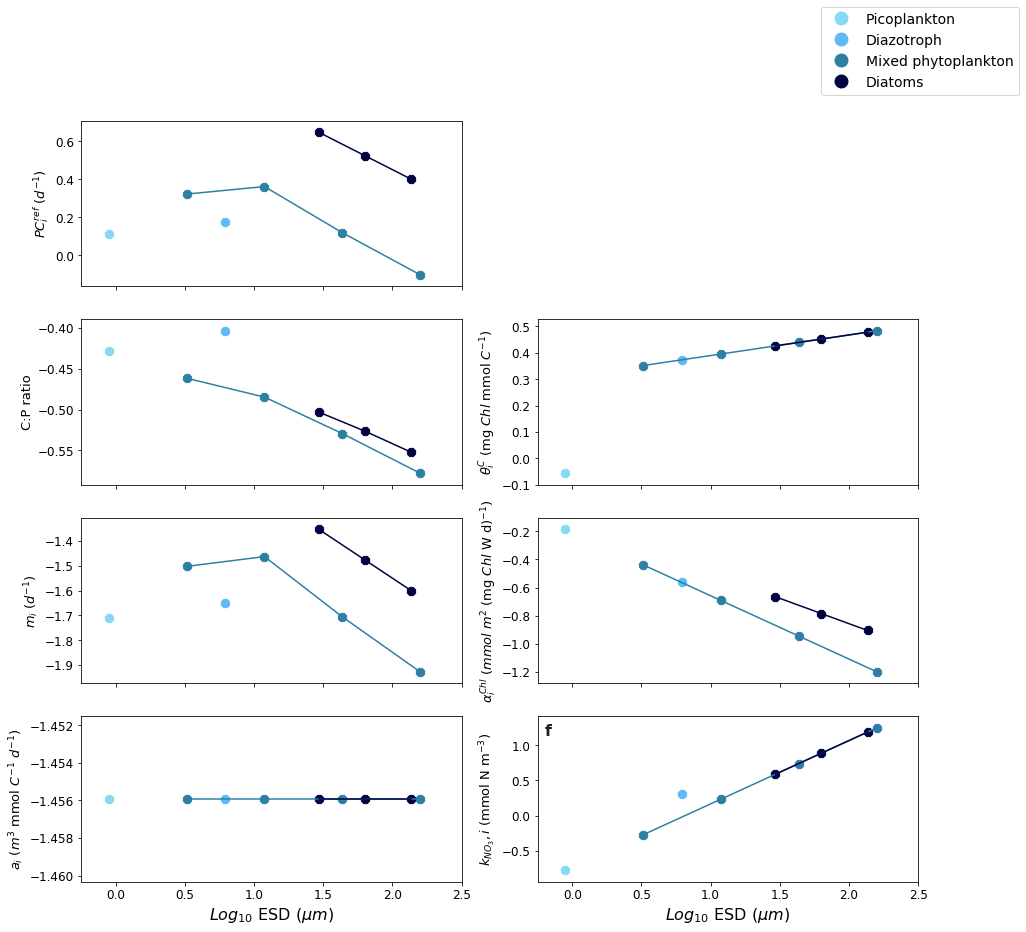

In [17]:
fig = plt.figure(figsize=(15, 14))
cmap=matplotlib.cm.get_cmap('gray', 10)
gs = GridSpec(nrows=4, ncols=2)
symbols = ['#86daf4','#60baf7', '#2d80a4','#000140']
plankton = np.array([1.,3.,2.,3.,4.,3.,4.,4.,3.])

#subplot 1
ax0 = fig.add_subplot(gs[0, 0])
pylab.plot(x_pp,PCref_pp, '-', color='#86daf4')
pylab.plot(x_diaz,PCref_diaz, '-', color='#60baf7')
pylab.plot(x_mp,PCref_mp, '-', color='#2d80a4')
pylab.plot(x_diat,PCref_diat, '-', color='#000140')
for value, cols in zip(np.unique(plankton), symbols):
    mask = (plankton == value)
    plt.scatter(xo[mask],PCref_per_dayo[mask], color=cols, marker ='8',s=80)
plt.yticks(fontsize= 12);plt.xticks(fontsize= 12);
plt.xlim((-0.25, 2.5)) 
plt.setp(ax0.get_xticklabels(), visible=False)
pylab.ylabel('$PC_i^{ref}$ ($d^{-1}$)',fontsize = 13) 
#ax0.text(-0.2, 0.65, 'a',fontsize=16, fontweight='bold', va='top',color='262626')

#subplot 1
ax0 = fig.add_subplot(gs[1, 0])
pylab.plot(x_pp,1/Qp_fixed_pp, '-', color='#86daf4')
pylab.plot(x_diaz,1/Qp_fixed_diaz, '-', color='#60baf7')
pylab.plot(x_mp,1/Qp_fixed_mp, '-', color='#2d80a4')
pylab.plot(x_diat,1/Qp_fixed_diat, '-', color='#000140')
for value, cols in zip(np.unique(plankton), symbols):
    mask = (plankton == value)
    plt.scatter(xo[mask],1/yo[mask], color=cols, marker ='8',s=80)
plt.yticks(fontsize= 12);plt.xticks(fontsize= 12);
plt.xlim((-0.25, 2.5)) 
plt.setp(ax0.get_xticklabels(), visible=False)
pylab.ylabel('C:P ratio',fontsize = 13) 

# subplot 2 
ax1 = fig.add_subplot(gs[2, 0])
pylab.plot(x_pp,mort_pp, '-', color='#86daf4')
pylab.plot(x_diaz,mort_diaz, '-', color='#60baf7')
pylab.plot(x_mp,mort_mp, '-', color='#2d80a4')
pylab.plot(x_diat,mort_diat, '-', color='#000140')
for value, cols in zip(np.unique(plankton), symbols):
    mask = (plankton == value)
    plt.scatter(xo[mask],mort_per_day[mask], color=cols, marker ='8',s=80)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.xlim((-0.25, 2.5)) 
plt.yticks(fontsize= 12);plt.xticks(fontsize= 12);
pylab.ylabel('$m_i$ ($d^{-1}$)',fontsize = 13) 
#ax1.text(-0.2, -1.35, 'c',fontsize=16, fontweight='bold', va='top',color='262626')

# subplot 3 
ax2 = fig.add_subplot(gs[3, 0])
pylab.plot(x_pp,mort2_pp, '-', color='#86daf4')
pylab.plot(x_diaz,mort2_diaz, '-', color='#60baf7')
pylab.plot(x_mp,mort2_mp, '-', color='#2d80a4')
pylab.plot(x_diat,mort2_diat, '-', color='#000140')
for value, cols in zip(np.unique(plankton), symbols):
    mask = (plankton == value)
    plt.scatter(xo[mask],mort2_per_day[mask], color=cols, marker ='8',s=80)
pylab.ylabel('$a_i$ ($m^3$ mmol $C^{-1}$ $d^{-1}$)',fontsize = 13) 
plt.yticks(fontsize= 12);plt.xticks(fontsize= 12);
plt.xlim((-0.25, 2.5)) 
#ax2.text(-0.2, -1.4517, 'e',fontsize=16, fontweight='bold', va='top',color='262626')
pylab.xlabel('$Log_{10}$ ESD ($\u03BC m$)',fontdict=font) 

# subplot 4 
ax4 = fig.add_subplot(gs[1, 1])
pylab.plot(x_pp,thetaN_max_pp, '-', color='#86daf4')
pylab.plot(x_diaz,thetaN_max_diaz, '-', color='#60baf7')
pylab.plot(x_mp,thetaN_max_mp, '-', color='#2d80a4')
pylab.plot(x_diat,thetaN_max_diat, '-', color='#000140')
for value, cols in zip(np.unique(plankton), symbols):
    mask = (plankton == value)
    plt.scatter(xo[mask],thetaN_maxo[mask], color=cols, marker ='8',s=80)
plt.xlim((-0.25, 2.5)) 
plt.setp(ax4.get_xticklabels(), visible=False)
pylab.ylabel('$\u03B8_i^C$ (mg $Chl$ mmol $C^{-1}$)',fontsize = 13) 
plt.yticks(fontsize= 12);plt.xticks(fontsize= 12);
#ax4.text(-0.2, 0.5, 'b',fontsize=16, fontweight='bold', va='top',color='262626')

ax5 = fig.add_subplot(gs[2, 1])
pylab.plot(x_pp,alphaPI_pp, '-', color='#86daf4')
pylab.plot(x_diaz,alphaPI_diaz, '-', color='#60baf7')
pylab.plot(x_mp,alphaPI_mp, '-', color='#2d80a4')
pylab.plot(x_diat,alphaPI_diat, '-', color='#000140')
for value, cols in zip(np.unique(plankton), symbols):
    mask = (plankton == value)
    plt.scatter(xo[mask],alphaPI_per_dayo[mask],  color=cols, marker ='8',s=80)
pylab.ylabel('$\u03B1_i^{Chl}$ ($mmol$ $m^2$ (mg $Chl$ W d$)^{-1}$)',fontsize = 13)
plt.xlim((-0.25, 2.5)) 
plt.setp(ax5.get_xticklabels(), visible=False)
plt.yticks(fontsize= 12);plt.xticks(fontsize= 12);
#ax5.text(-0.2, -0.18, 'd',fontsize=16, fontweight='bold', va='top',color='262626')

# subplot 4
ax6 = fig.add_subplot(gs[3, 1])
pylab.plot(x_pp,kNO3_pp, '-', color='#86daf4')
pylab.plot(x_diaz,kNO3_diaz, '-', color='#60baf7')
pylab.plot(x_mp,kNO3_mp, '-', color='#2d80a4')
pylab.plot(x_diat,kNO3_diat, '-', color='#000140')
for value, cols in zip(np.unique(plankton), symbols):
    mask = (plankton == value)
    plt.scatter(xo[mask],kNO3o[mask],  color=cols, marker ='8',s=80)
pylab.xlabel('$Log_{10}$ ESD ($\u03BC m$)',fontdict=font) 
pylab.ylabel('$k_{NO_3},i$ (mmol N m$^{-3}$)',fontsize = 13) 
ax6.text(-0.2, 1.3, 'f',fontsize=16, fontweight='bold', va='top',color='262626')
plt.xlim((-0.25, 2.5)) 
plt.yticks(fontsize= 12);plt.xticks(fontsize= 12);
#fig.text(0.06, 0.5, '$Log_{10}$ parameter value', fontsize=18, fontdict=font, ha='center', va='center', rotation='vertical')

# Create the legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o', color='w', label='Picoplankton',markerfacecolor='#86daf4', markersize=15),
                Line2D([0], [0], marker='o', color='w', label='Diazotroph',markerfacecolor='#60baf7', markersize=15),
                Line2D([0], [0], marker='o', color='w', label='Mixed phytoplankton',markerfacecolor='#2d80a4', markersize=15),
                Line2D([0], [0], marker='o', color='w', label='Diatoms',markerfacecolor='#000140', markersize=15)]


#lines = ax.plot(data)
fig.legend(custom_lines, ["Picoplankton", "Diazotroph", "Mixed phytoplankton","Diatoms"],ncol=1,loc='upper right', fontsize =14)

plt.show()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+file+'/phyto_trait_2_'+file+''+'.jpg',dpi=600, bbox_inches='tight')

In [ ]:
gs[0, 1]

##### Zooplankton Parameters

In [15]:
## old file
x               = np.log10(szo.ESD_mm) # mm
z_umax_base      = np.log10(szo.z_umax_base)
z_grz            = np.log10(szo.z_grz)
z_mort_0_per_day = np.log10(szo.z_mort_0_per_day)
z_mort2_0_per_day= np.log10(szo.z_mort2_0_per_day)
graze_doc        = np.log10(szo.graze_doc)
f_zoo_detr       = np.log10(szo.f_zoo_detr)

#### Zooplankton trait figure

In [16]:
opt_pred_prey_ratio = 12.5
opt_pred_prey_beta = 0.15
opt_pred_prey_sd_const = 9
opt_pred_prey_sd_beta = 0.1

pred_prey = opt_pred_prey_ratio * szo.ESD_mm**opt_pred_prey_beta
opt_pred_prey_sd_new = pred_prey/2
pred_prey_sd = opt_pred_prey_sd_const * szo.ESD_mm**opt_pred_prey_sd_beta

In [17]:
import scipy
from scipy.stats import norm

In [18]:
x = np.arange(0.1, 30, 0.1)
y_zoo1 = scipy.stats.norm.cdf(-abs(x-pred_prey[0]),loc = 0, scale=opt_pred_prey_sd_new[0]) * 2
y_zoo2 = scipy.stats.norm.cdf(-abs(x-pred_prey[1]),loc = 0, scale=opt_pred_prey_sd_new[1]) * 2
y_zoo3 = scipy.stats.norm.cdf(-abs(x-pred_prey[2]),loc = 0, scale=opt_pred_prey_sd_new[2]) * 2
y_zoo4 = scipy.stats.norm.cdf(-abs(x-pred_prey[3]),loc = 0, scale=opt_pred_prey_sd_new[3]) * 2
y_zoo5 = scipy.stats.norm.cdf(-abs(x-pred_prey[4]),loc = 0, scale=opt_pred_prey_sd_new[4]) * 2
y_zoo6 = scipy.stats.norm.cdf(-abs(x-pred_prey[5]),loc = 0, scale=opt_pred_prey_sd_new[5]) * 2

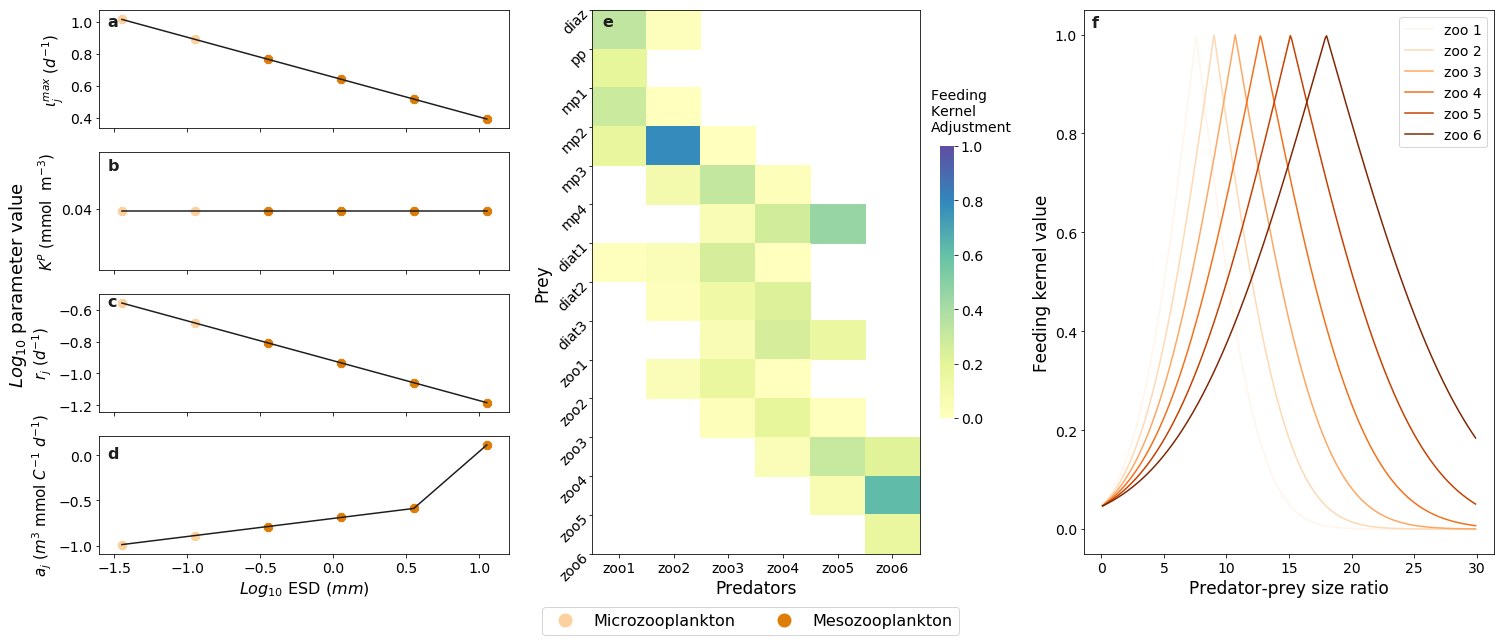

In [21]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(25, 10))
cmap=matplotlib.cm.get_cmap('gray', 10)
gs = GridSpec(nrows=4, ncols=3)
symbols = ['#FCD19E','#DE7C08']
plankton = np.array([1.,1.,2.,2.,2.,2.])
x = np.log10(szo.ESD_mm) # mm

#subplot 1
ax0 = fig.add_subplot(gs[0, 0])
pylab.plot(x,z_umax_base, '-', color='262626')
for value, cols in zip(np.unique(plankton), symbols):
    mask = (plankton == value)
    plt.scatter(x[mask],z_umax_base[mask], marker='8',s=80, color=cols)
    pylab.ylabel('$\u03B9_j^{max}$ ($d^{-1}$)',fontsize=15)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.yticks(fontsize= 14);plt.xticks(fontsize= 14);
ax0.text(-1.55, 1.05, 'a',fontsize=16, fontweight='bold', va='top',color='262626')

#subplot 2
ax1 = fig.add_subplot(gs[1, 0])
pylab.plot(x,z_grz, '-', color='262626')
for value, cols in zip(np.unique(plankton), symbols):
    mask = (plankton == value)
    plt.scatter(x[mask],z_grz[mask], marker='8',s=80, color=cols)
pylab.ylabel('$K^P$ (mmol  m$^{-3}$)',fontsize=15)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.text(-1.55, 0.04155, 'b',fontsize=16, fontweight='bold', va='top',color='262626')
plt.yticks(fontsize= 14);plt.xticks(fontsize= 14);
ax1.set_yticks([0.0414])

labels = [item.get_text() for item in ax1.get_yticklabels()]
labels[0] = '0.04'
ax1.set_yticklabels(labels)

# subplot 3 
ax2 = fig.add_subplot(gs[2, 0])
pylab.plot(x,z_mort_0_per_day, '-', color='262626')
for value, cols in zip(np.unique(plankton), symbols):
    mask = (plankton == value)
    plt.scatter(x[mask],z_mort_0_per_day[mask], marker='8',s=80, color=cols)
plt.setp(ax2.get_xticklabels(), visible=False)
pylab.ylabel('$r_j$ ($d^{-1}$)',fontsize=15)
ax2.text(-1.55, -0.5, 'c',fontsize=16, fontweight='bold', va='top',color='262626')
plt.yticks(fontsize= 14);plt.xticks(fontsize= 14);

# subplot 4 
ax3 = fig.add_subplot(gs[3, 0])
pylab.plot(x,z_mort2_0_per_day, '-', color='262626')
for value, cols in zip(np.unique(plankton), symbols):
    mask = (plankton == value)
    plt.scatter(x[mask],z_mort2_0_per_day[mask], marker='8',s=80, color=cols)
plt.setp(ax1.get_xticklabels(), visible=False)
pylab.ylabel('$a_j$ ($m^3$ mmol $C^{-1}$ $d^{-1}$)',fontsize=15)
pylab.xlabel('$Log_{10}$ ESD ($mm$)',fontdict=font)
ax3.text(-1.55, 0.1, 'd',fontsize=16, fontweight='bold', va='top',color='262626')
plt.yticks(fontsize= 14);plt.xticks(fontsize= 14);

# subplot 5
x = np.arange(0.1, 30, 0.1)
y_zoo1 = scipy.stats.norm.cdf(-abs(x-pred_prey[0]),loc = 0, scale=opt_pred_prey_sd_new[0]) * 2
y_zoo2 = scipy.stats.norm.cdf(-abs(x-pred_prey[1]),loc = 0, scale=opt_pred_prey_sd_new[1]) * 2
y_zoo3 = scipy.stats.norm.cdf(-abs(x-pred_prey[2]),loc = 0, scale=opt_pred_prey_sd_new[2]) * 2
y_zoo4 = scipy.stats.norm.cdf(-abs(x-pred_prey[3]),loc = 0, scale=opt_pred_prey_sd_new[3]) * 2
y_zoo5 = scipy.stats.norm.cdf(-abs(x-pred_prey[4]),loc = 0, scale=opt_pred_prey_sd_new[4]) * 2
y_zoo6 = scipy.stats.norm.cdf(-abs(x-pred_prey[5]),loc = 0, scale=opt_pred_prey_sd_new[5]) * 2

ax5 = fig.add_subplot(gs[:, 2])
cmap=matplotlib.cm.get_cmap('Oranges', 11)
pylab.plot(x,y_zoo1, '-', color=cmap(0), label = 'zoo 1' )
pylab.plot(x,y_zoo2, '-', color=cmap(2), label = 'zoo 2' )
pylab.plot(x,y_zoo3, '-', color=cmap(4), label = 'zoo 3' )
pylab.plot(x,y_zoo4, '-', color=cmap(6), label = 'zoo 4' )
pylab.plot(x,y_zoo5, '-', color=cmap(8), label = 'zoo 5' )
pylab.plot(x,y_zoo6, '-', color=cmap(10), label = 'zoo 6' )
plt.yticks(fontsize= 14);plt.xticks(fontsize= 14);
plt.legend(loc='outside',fontsize=14)
pylab.ylabel('Feeding kernel value',fontsize = 17) 
pylab.xlabel('Predator-prey size ratio',fontsize = 17) 
ax5.text(-0.75, 1.04, 'f',fontsize=16, fontweight='bold', va='top',color='262626')

# Create the legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor='#FCD19E', markersize=15),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='#DE7C08', markersize=15)]
fig.legend(custom_lines, ["Microzooplankton", "Mesozooplankton"],ncol=2,loc='lower center',fontsize=16)


# subplot 6
ax4 = fig.add_subplot(gs[:, 1])
ax = sns.heatmap(gf,center=0,vmin=0, vmax=1,cmap="Spectral",cbar=True, cbar_kws={"shrink": .5})
prey = ['zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']
predators = ["diaz",'pp','mp1','mp2','mp3','mp4','diat1','diat2','diat3','zoo1','zoo2',
                   'zoo3','zoo4','zoo5','zoo6']

ax.set_yticks(np.arange(len(predators))); ax.set_xticks(np.arange(len(prey))+0.5)
ax.set_yticklabels(predators, fontsize=14); ax.set_xticklabels(prey, fontsize=14)
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",rotation_mode="anchor")
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
#cbar.set_label('$Max$ \n$grazing$ \n$rate$', fontsize =12,position=(0,1.2), rotation=0)
ax4.text(6.2, 2, 'Feeding \nKernel \nAdjustment',fontsize=14, va='top')
ax.set_ylabel('Prey',fontdict=font,fontsize =17)
ax.set_xlabel('Predators',fontdict=font,fontsize =17)
ax4.text(0.2, 0.1, 'e',fontsize=16, fontweight='bold', va='top',color='262626')
for _, spine in ax.spines.items():
    spine.set_visible(True)
    
fig.text(0.08, 0.5, '$Log_{10}$ parameter value', fontsize=18, fontdict=font, ha='center', va='center', rotation='vertical')
    
plt.show() # ta-da!
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/GNG595/zoo_trait_GNG595.jpg',dpi=600, bbox_inches='tight')